In [1]:
!pip install --upgrade matplotlib


  Using cached matplotlib-3.7.5-cp38-cp38-win_amd64.whl (7.5 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.3.4
    Uninstalling matplotlib-3.3.4:
      Successfully uninstalled matplotlib-3.3.4


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # for visualizing data
import seaborn as sns

In [3]:
df = pd.read_csv(r'C:\Users\Saurav\Downloads\My_All_DA_Project\Diwali_Sales_Analysis_PY\Diwali Sales Data.csv',encoding = 'unicode_escape') 
# r = file location me underscore( __ ) ya hyphan ( --) ho to usko read krne k liye 
#To avoid encoding error , use 'unicode_escape'


In [4]:
df

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370.0,NaN,NaN
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367.0,NaN,NaN
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213.0,NaN,NaN
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206.0,NaN,NaN


# DATA CLEANING 

In [5]:
df.shape # it will show total ROW (11251) and Column(15)

(11251, 15)

In [6]:
df.head(10) #top 5 records

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.00,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.00,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.00,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.00,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.00,NaN,NaN
5,1000588,Joni,P00057942,M,26-35,28,1,Himachal Pradesh,Northern,Food Processing,Auto,1,23877.00,NaN,NaN
6,1001132,Balk,P00018042,F,18-25,25,1,Uttar Pradesh,Central,Lawyer,Auto,4,23841.00,NaN,NaN
7,1002092,Shivangi,P00273442,F,55+,61,0,Maharashtra,Western,IT Sector,Auto,1,NaN,NaN,NaN
8,1003224,Kushal,P00205642,M,26-35,35,0,Uttar Pradesh,Central,Govt,Auto,2,23809.00,NaN,NaN
9,1003650,Ginny,P00031142,F,26-35,26,1,Andhra Pradesh,Southern,Media,Auto,4,23799.99,NaN,NaN


In [7]:
df.tail(10) #last (5 records)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
11241,1003032,Matthias,P00058042,F,26-35,33,0,Delhi,Central,Hospitality,Office,3,384.0,NaN,NaN
11242,1004344,Hildebrand,P00185442,F,26-35,27,1,Delhi,Central,Healthcare,Office,2,382.0,NaN,NaN
11243,1005446,Sheetal,P00297742,M,51-55,53,0,Gujarat,Western,Healthcare,Office,1,382.0,NaN,NaN
11244,1005446,Sheetal,P00297742,M,51-55,53,0,Madhya Pradesh,Central,Healthcare,Office,2,382.0,NaN,NaN
11245,1004140,Bertelson,P00057442,F,26-35,31,1,Delhi,Central,Aviation,Office,2,381.0,NaN,NaN
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370.0,NaN,NaN
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367.0,NaN,NaN
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213.0,NaN,NaN
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206.0,NaN,NaN
11250,1002744,Brumley,P00281742,F,18-25,19,0,Maharashtra,Western,Healthcare,Office,3,188.0,NaN,NaN


In [8]:
df.info() #datatype , null value or not or missing value, with column name

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [9]:
#for drop unrelated / blank column 
df.drop(['Status','unnamed1'], axis = 1, inplace = True) 
# axis = 1  : to delete whole column 
#inplace = True : koi bhi function use krne k baad data ko save krne k liye.....
#inplace ka use krte hai nahi toh vo jupyter restart krne k baad vo data delete ho jayega.


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


In [11]:
pd.isnull(df)
# to check null value

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,False,False,False,False,False,False,False,False,False,False,False,False,False
11247,False,False,False,False,False,False,False,False,False,False,False,False,False
11248,False,False,False,False,False,False,False,False,False,False,False,False,False
11249,False,False,False,False,False,False,False,False,False,False,False,False,False


In [12]:
pd.isnull(df).sum()
#.sum() hume direct vo column me lekar jayega jaha null value hai and hai to vo bhi kitna hai.

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [13]:
df.shape

(11251, 13)

In [14]:
# to drop null value :
df.dropna(inplace = True)

In [15]:
df.shape

(11239, 13)

In [16]:
pd.isnull(df).sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [17]:
#To change data type :
df['Amount'] = df['Amount'].astype('int')

In [18]:
df['Amount'].dtypes

dtype('int32')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11239 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   User_ID           11239 non-null  int64 
 1   Cust_name         11239 non-null  object
 2   Product_ID        11239 non-null  object
 3   Gender            11239 non-null  object
 4   Age Group         11239 non-null  object
 5   Age               11239 non-null  int64 
 6   Marital_Status    11239 non-null  int64 
 7   State             11239 non-null  object
 8   Zone              11239 non-null  object
 9   Occupation        11239 non-null  object
 10  Product_Category  11239 non-null  object
 11  Orders            11239 non-null  int64 
 12  Amount            11239 non-null  int32 
dtypes: int32(1), int64(4), object(8)
memory usage: 1.2+ MB


In [20]:
# data frame k andar konse konse column hai :
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [21]:
# REname the column Name :
df.rename(columns= {'Marital_Status' : 'Shaadi'})

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Shaadi,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206


In [22]:
#Describe() method return description of the data in the dataframe ( ie. count, mean,min, max,std etc.)
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [23]:
# Use Dscribe () fro specific columns :
df[['Age','Orders','Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


# EXPLORATORY DATA ANALYSIS

# Gender

In [29]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

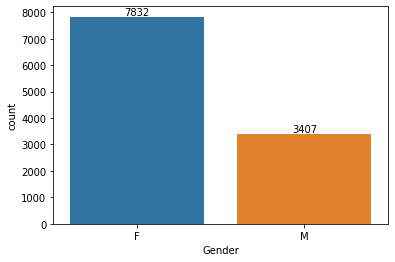

In [24]:
ad = sns.countplot(x = 'Gender', data = df)

for bars in ad.containers :
    ad.bar_label(bars)

<Axes: xlabel='Gender', ylabel='Amount'>

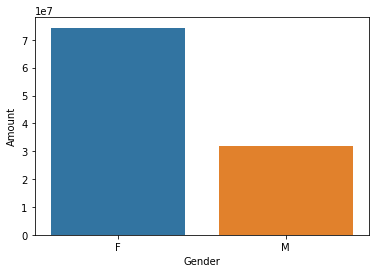

In [28]:
Sales_gen = df.groupby(['Gender'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False)

sns.barplot(x = 'Gender', y = 'Amount', data = Sales_gen)

 From above graph we see that most of the buyers are females and even the purchasing power of females are greater than men.


# Age 

In [30]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

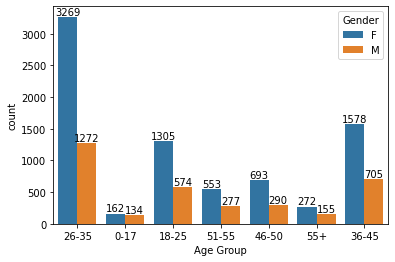

In [33]:
ad = sns.countplot(x = 'Age Group', data = df, hue = 'Gender')

for bars in ad.containers :
    ad.bar_label(bars)

<Axes: xlabel='Age Group', ylabel='Amount'>

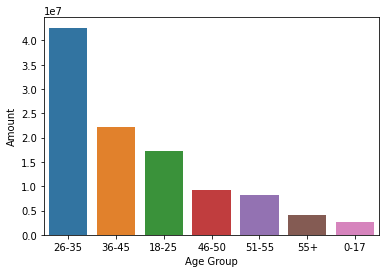

In [34]:
Sales_Age = df.groupby(['Age Group'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False)

sns.barplot(x = 'Age Group', y = 'Amount', data = Sales_Age)

from above graph we can see that most of the buyers are of age group between 26-35 years female.

# STATE

In [39]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

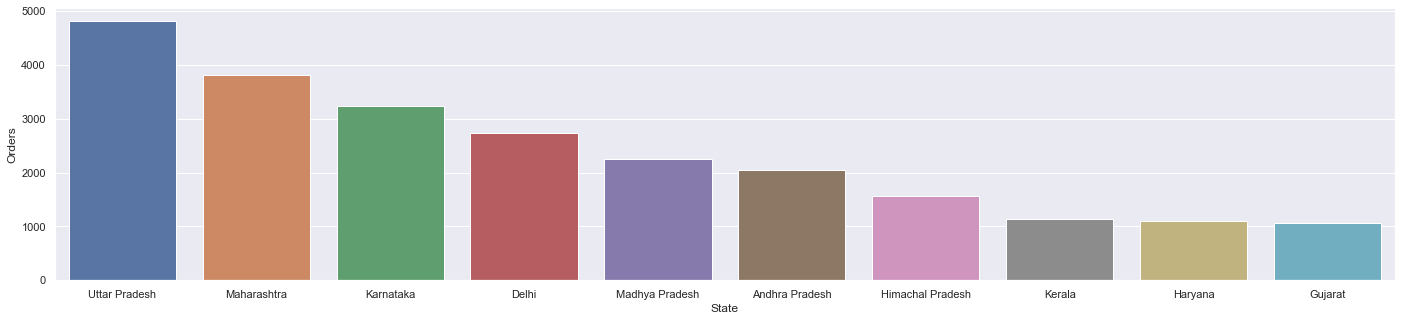

In [58]:
# Total number of orders from top 10 States

Sales_State = df.groupby(['State'], as_index = False)['Orders'].sum().sort_values(by = 'Orders', ascending = False).head(10)

sns.barplot(x = 'State', y = 'Orders', data = Sales_State)
sns.set(rc={'figure.figsize':(20,5)})

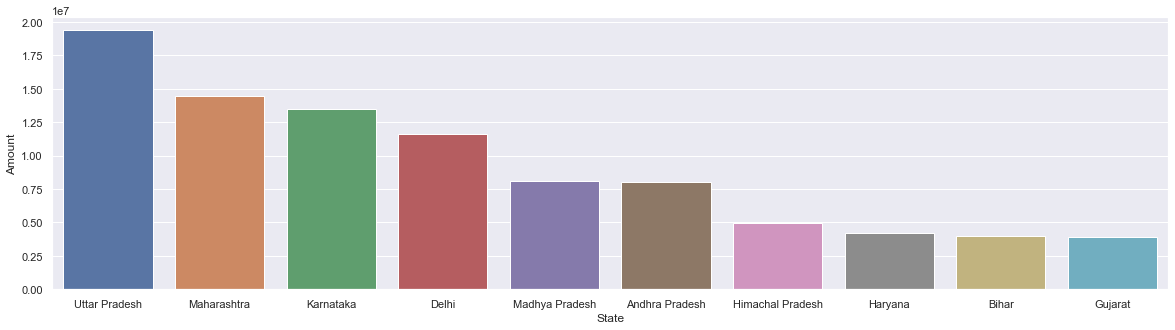

In [60]:
Sales_State = df.groupby(['State'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False).head(10)

sns.barplot(x = 'State', y = 'Amount', data = Sales_State)
sns.set(rc={'figure.figsize':(20,5)})

In [61]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

from above graph we can see that most of the Orders and Total Sales/Amount from Uttar Pradesh, Karnataka, Maharashtra respectively.

# Marital Status

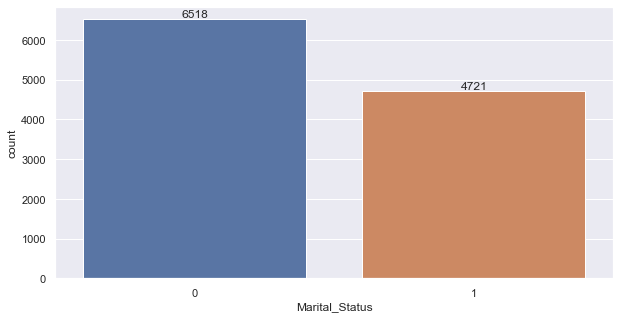

In [69]:
ad = sns.countplot(x = 'Marital_Status', data = df)
sns.set(rc={'figure.figsize':(8,5)})

for bars in ad.containers :
    ad.bar_label(bars)
    
    

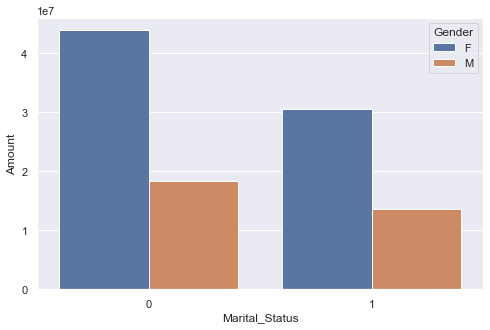

In [71]:
Sales_State = df.groupby(['Marital_Status', 'Gender'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False).head(10)

sns.barplot(x = 'Marital_Status', y = 'Amount',hue = 'Gender', data = Sales_State)
sns.set(rc={'figure.figsize':(20,5)})

From above graph we can see that most of the buyers are married (Women) and they have high purchasing power.

# Occupation

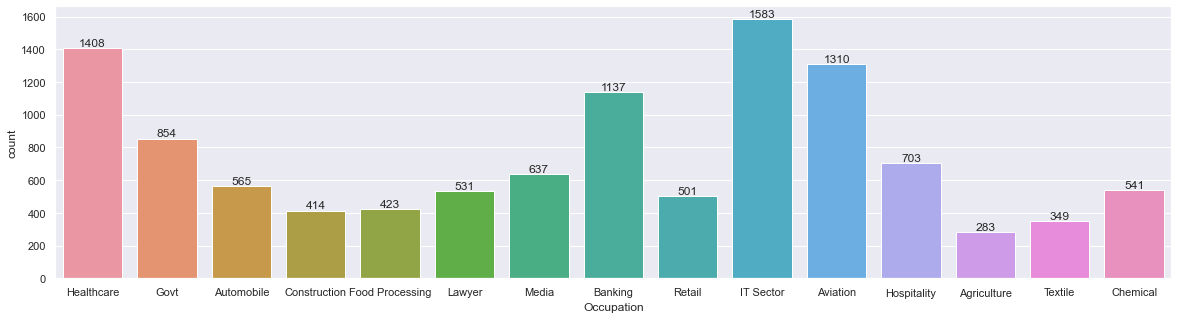

In [73]:
ad = sns.countplot(x = 'Occupation', data = df)
sns.set(rc={'figure.figsize':(8,5)})

for bars in ad.containers :
    ad.bar_label(bars)

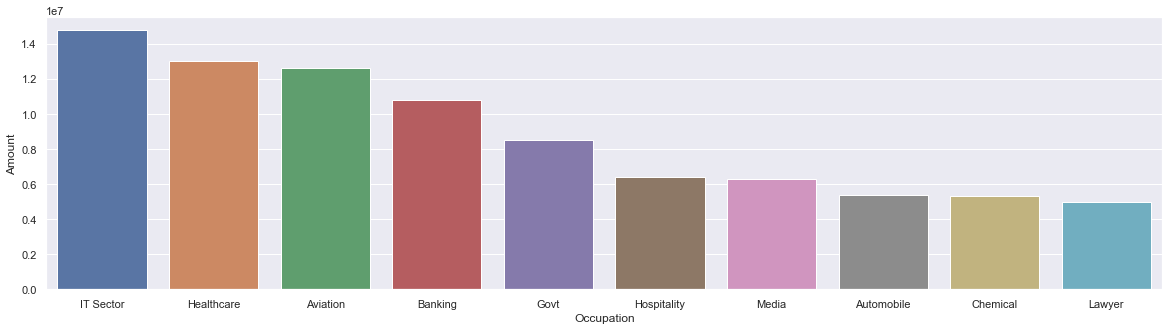

In [75]:
Sales_State = df.groupby(['Occupation'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False).head(10)

sns.barplot(x = 'Occupation', y = 'Amount', data = Sales_State)
sns.set(rc={'figure.figsize':(25,5)})

From above graph we can see that most of the buyers are working IT, Healthcare and Aviation.

In [77]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

# Product Category

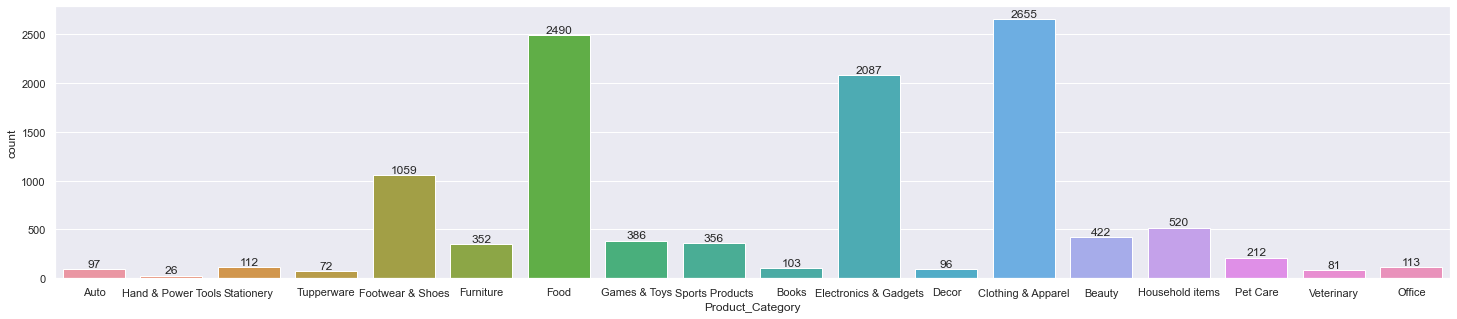

In [83]:
ad = sns.countplot(x = 'Product_Category', data = df)
sns.set(rc={'figure.figsize':(30,5)})

for bars in ad.containers :
    ad.bar_label(bars)

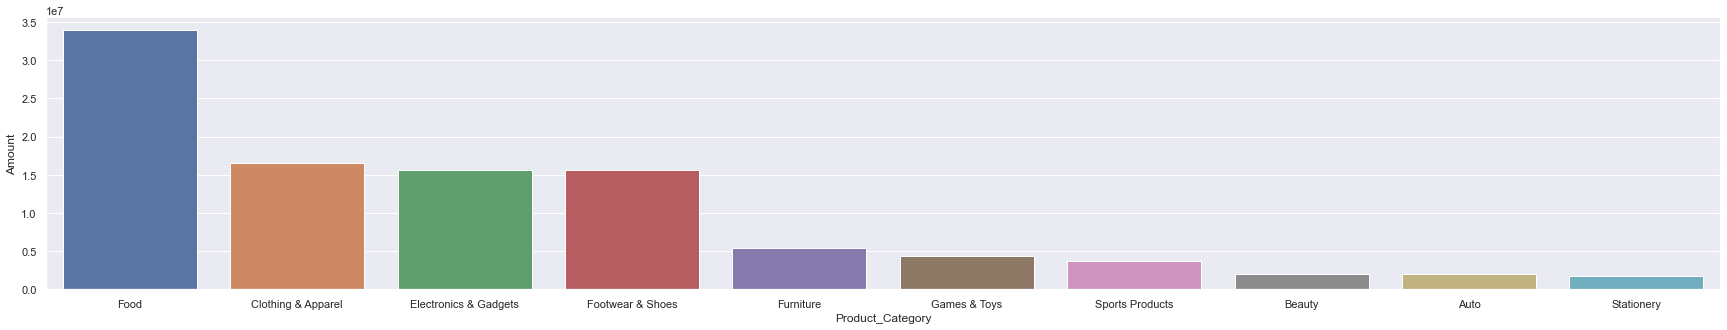

In [86]:
Sales_State = df.groupby(['Product_Category'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False).head(10)

sns.barplot(x = 'Product_Category', y = 'Amount', data = Sales_State)
sns.set(rc={'figure.figsize':(25,5)})

# From Above graph we can see the most of the Sold Product are from food, foot wear and  Electronics Category.

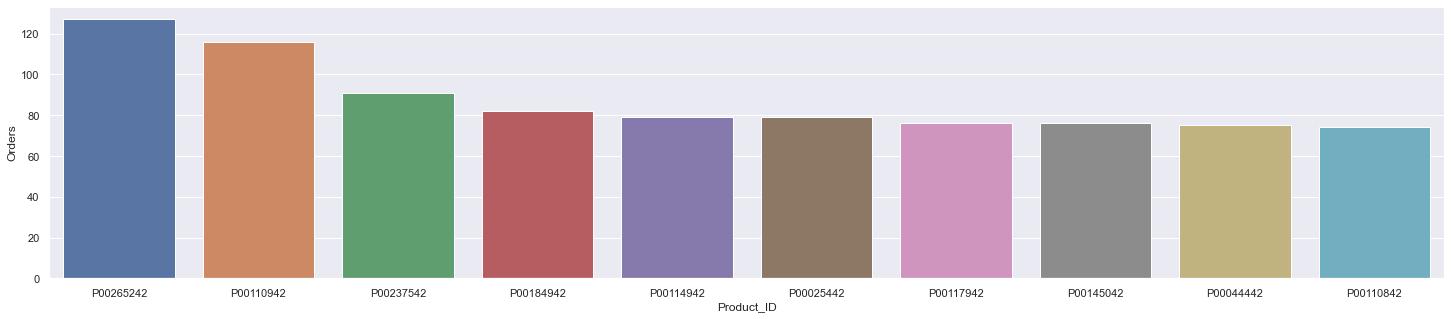

In [89]:
Sales_State = df.groupby(['Product_ID'], as_index = False)['Orders'].sum().sort_values(by = 'Orders', ascending = False).head(10)

sns.barplot(x = 'Product_ID', y = 'Orders', data = Sales_State)
sns.set(rc={'figure.figsize':(25,5)})

<Axes: xlabel='Product_ID'>

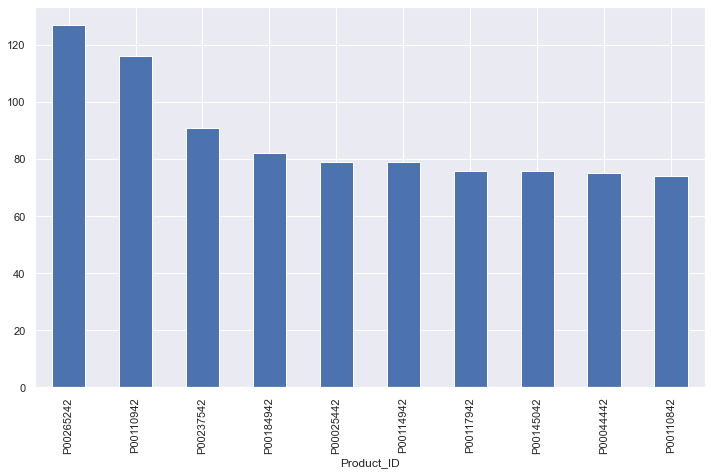

In [94]:
#Top 10th most sold product , (Some thing as above)
fig1 , ax1 = plt.subplots(figsize = (12,7)) 
df.groupby('Product_ID')['Orders'].sum().nlargest(10).sort_values(ascending = False).plot (kind = 'bar')

# Conclusion

Married women age group 26-35 years from Uttar Pradesh, Maharashtra, Karnataka working in IT , Healthcare and Aviation are more likely to buy Products from Food , Clothing and Electronic Category.


Project Leaning :

1 - performed data cleaning and manipulation.
2 - performed data exploratory analysis (EDA) usin pandas,matplotlib and seaborn libraries.
3 - Improved Customer experience by Identifying potential customers, across different states,Occupation , genders and Age group.
4 - Improved sales by identifying most selling prodeuct categories and products, which can help to plan inventory and hence meets the demand.